In [203]:
import numpy as np
import pyemma
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
import mdtraj as md

In [ ]:
# # code to copy
# dtrajs = np.load('randforest_distall_dtrajs.npy')
# dtrajs = [np.concatenate(x) for x in dtrajs]

# its = pyemma.msm.its(dtrajs, n_jobs=8)
# plt.figure(dpi=300)
# pyemma.plots.plot_implied_timescales(its)

# msm = pyemma.msm.estimate_markov_model(dtrajs, lag=200)
# msm.timescales()[0]
# msm.nstates
# msm.active_count_fraction
# emp_pi = np.array([Counter(np.concatenate(dtrajs))[x] for x in range(100)])
# emp_pi = emp_pi / np.sum(emp_pi)

# plt.figure(dpi=300)
# plt.scatter(emp_pi[msm.active_set],msm.pi)
# plt.plot([0,0.05], [0,0.05], color='red')
# plt.xlabel('Empirical population')
# plt.ylabel('MSM population')

# pcca = msm.pcca(2)
# pcca.coarse_grained_stationary_probability

In [11]:
dtrajs = np.load('randforest_distall_dtrajs.npy')

In [12]:
dtrajs = [np.concatenate(x) for x in dtrajs]

In [4]:
len(dtrajs)

3999

In [ ]:
# how many states for each system?
# 1000, 999, 1000, 1000: wt, ins, mut, ins_mut

In [35]:
len(set(np.concatenate(dtrajs[:1000])))

33

In [36]:
len(set(np.concatenate(dtrajs[1000:1000+999])))

70

In [37]:
len(set(np.concatenate(dtrajs[1000+999:1000+999+1000])))

31

In [39]:
len(set(np.concatenate(dtrajs[1000+999+1000:])))

70

In [ ]:
# what's the overlaps with wt?

In [104]:
len(set(np.concatenate(dtrajs[1000:1000+999])) - set(np.concatenate(dtrajs[:1000])))

66

In [106]:
len(set(np.concatenate(dtrajs[1000+999:1000+999+1000])) - set(np.concatenate(dtrajs[:1000])))

0

In [107]:
len(set(np.concatenate(dtrajs[1000+999+1000:])) - set(np.concatenate(dtrajs[:1000])))

67

In [108]:
# let's have a look at overlaps on slowest 2 tics # TODO

In [6]:
its = pyemma.msm.its(dtrajs, n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

/anaconda3/lib/python3.6/site-packages/msmtools/estimation/api.py:943: NotConvergedWarning: Reversible transition matrix estimation didn't converge.
  T = dense.mle_trev.mle_trev(C, **kwargs)
/anaconda3/lib/python3.6/site-packages/msmtools/estimation/api.py:943: NotConvergedWarning: Reversible transition matrix estimation didn't converge.
  T = dense.mle_trev.mle_trev(C, **kwargs)
/anaconda3/lib/python3.6/site-packages/msmtools/estimation/api.py:943: NotConvergedWarning: Reversible transition matrix estimation didn't converge.
  T = dense.mle_trev.mle_trev(C, **kwargs)


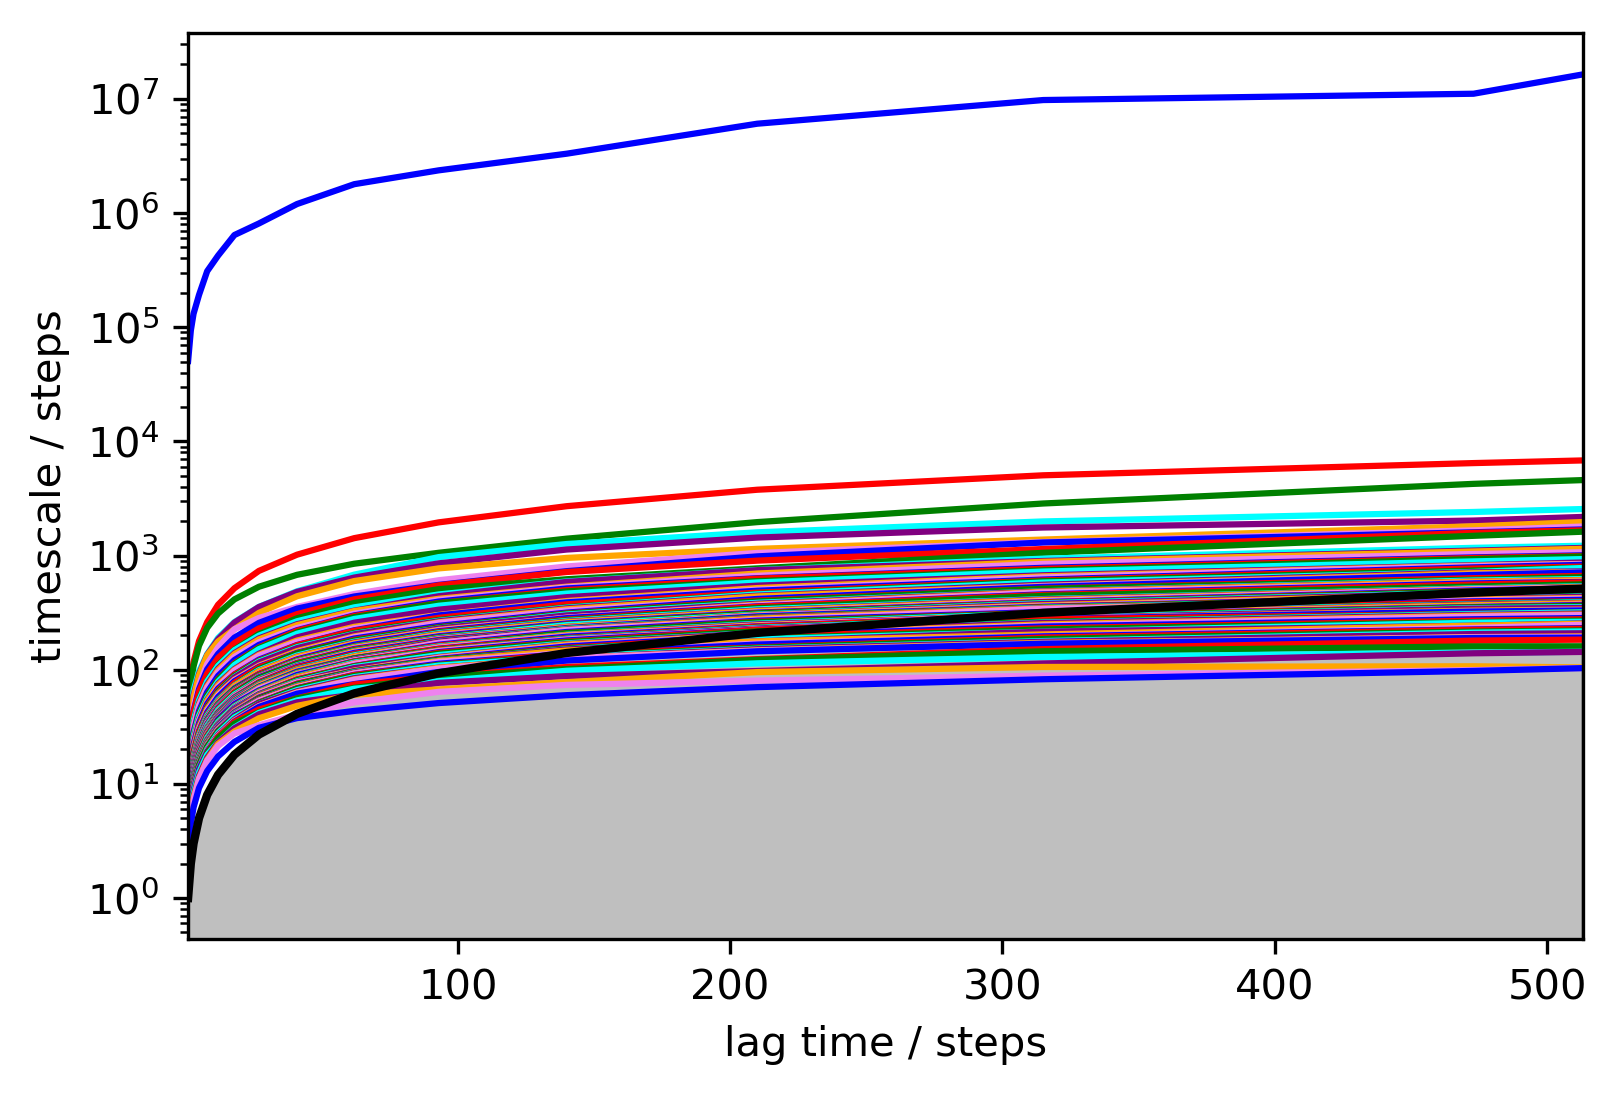

In [7]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its)

In [6]:
msm = pyemma.msm.estimate_markov_model(dtrajs, lag=200)

In [9]:
msm.timescales()[0]

5672884.392454988

In [10]:
msm.nstates

100

In [11]:
msm.active_count_fraction

1.0

In [12]:
emp_pi = np.array([Counter(np.concatenate(dtrajs))[x] for x in range(100)])
emp_pi = emp_pi / np.sum(emp_pi)

Text(0,0.5,'MSM population')

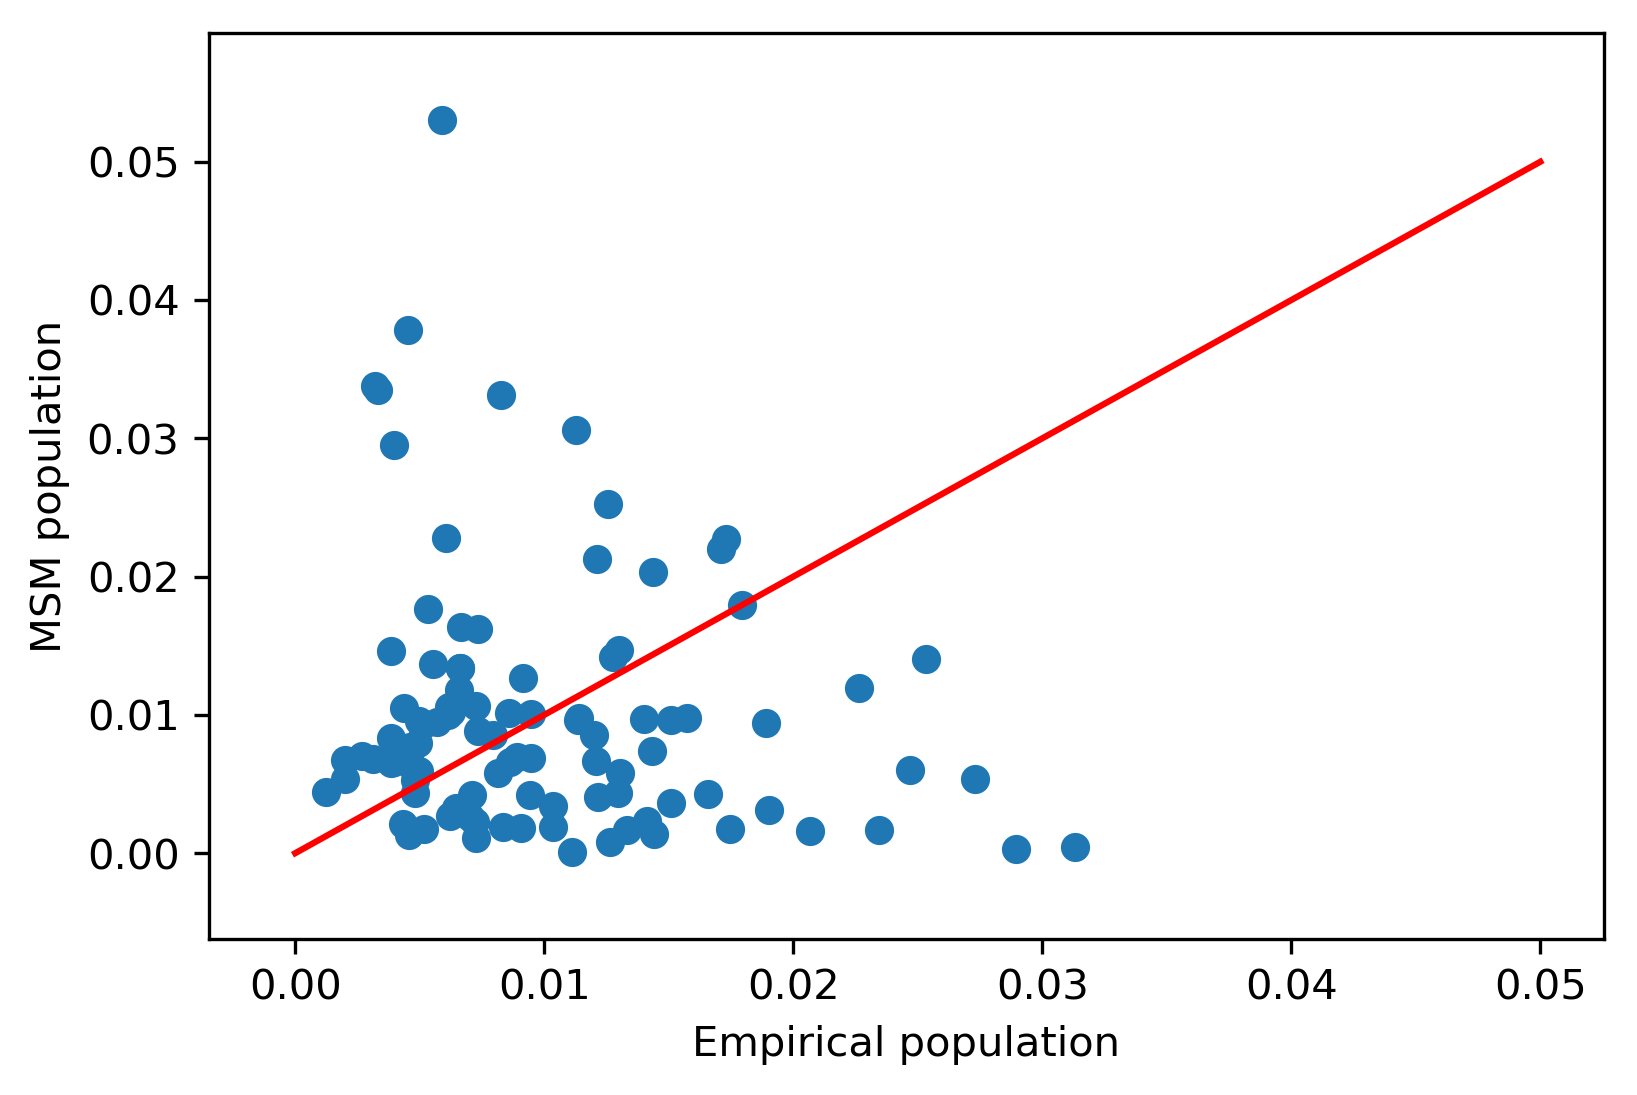

In [13]:
plt.figure(dpi=300)
plt.scatter(emp_pi[msm.active_set],msm.pi)
plt.plot([0,0.05], [0,0.05], color='red')
plt.xlabel('Empirical population')
plt.ylabel('MSM population')

In [ ]:
pcca = msm.pcca(2)

In [15]:
pcca.coarse_grained_stationary_probability

array([0.26369647, 0.73630353])

In [ ]:
# I think MSM of all systems together is not the right thing to do - let's make separate MSMs

In [ ]:
# wt first - get and examine macrostate samples

In [40]:
its = pyemma.msm.its(dtrajs[:1000], n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

20-03-19 19:44:20 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[3] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


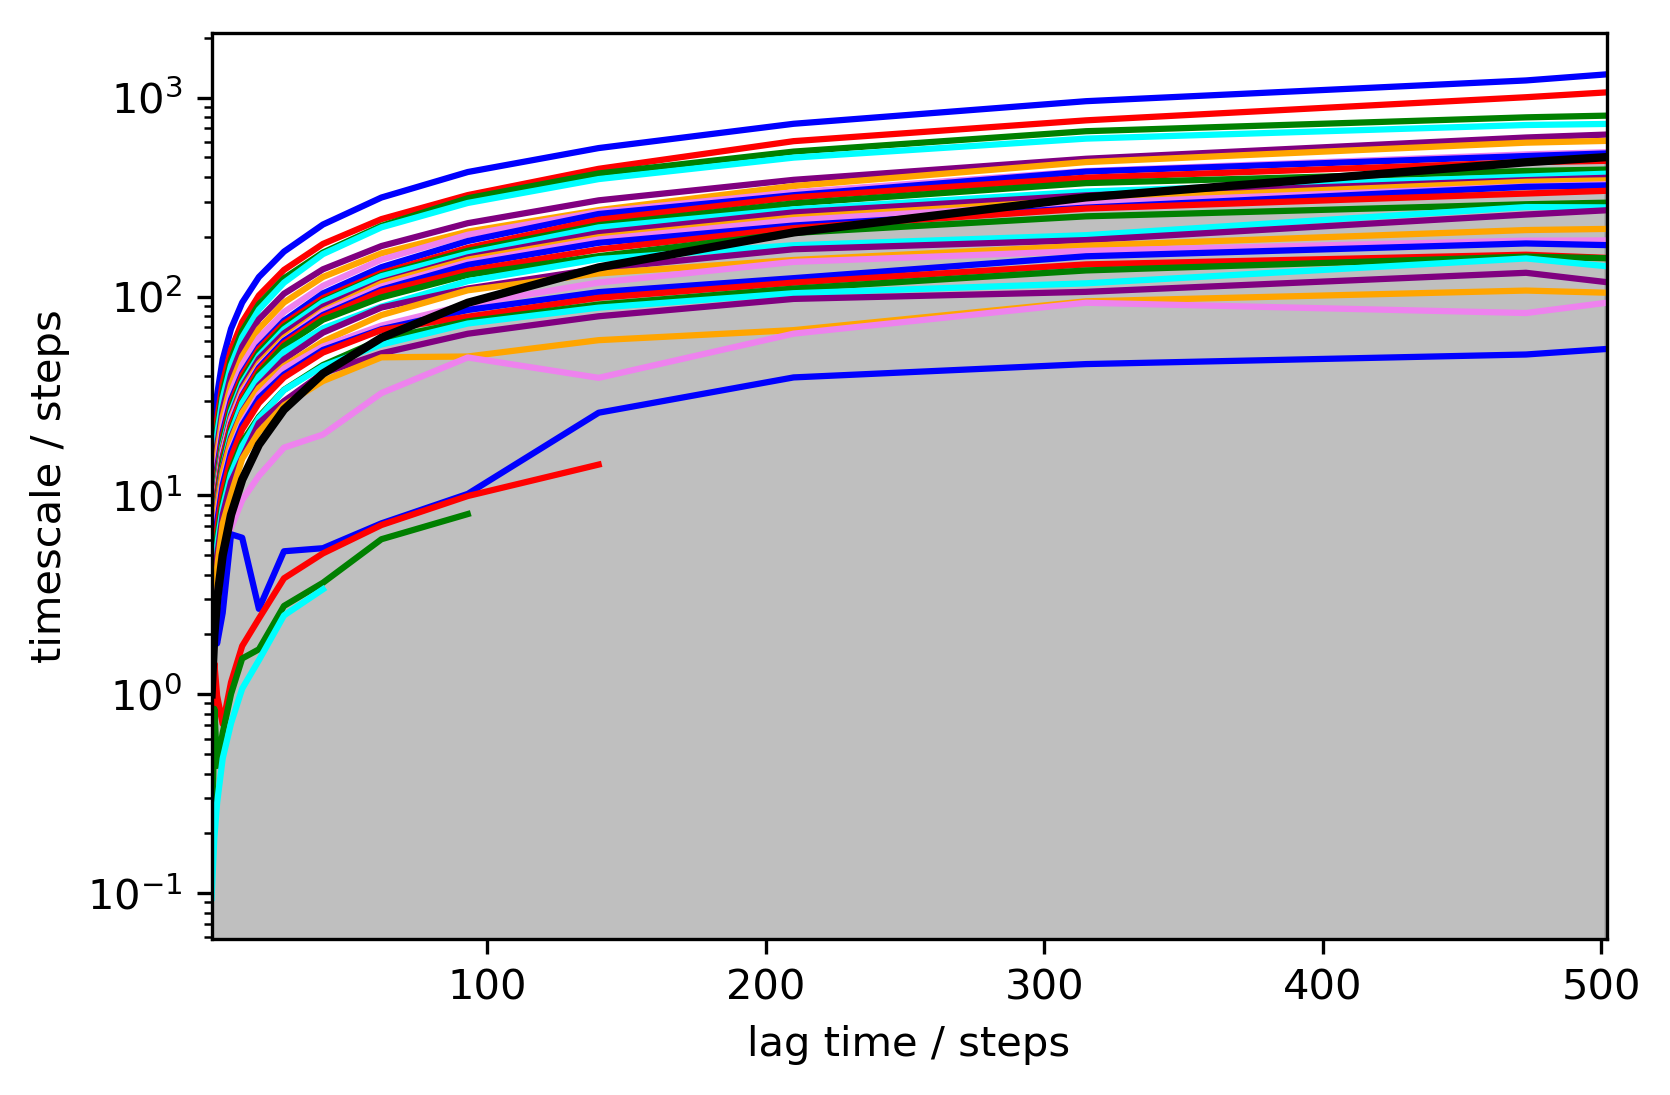

In [41]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its)

In [13]:
msm = pyemma.msm.estimate_markov_model(dtrajs[:1000], lag=200)

In [43]:
msm.timescales()[0]

717.519766647919

In [44]:
msm.nstates

30

In [45]:
msm.active_count_fraction

0.9999880458441875

In [46]:
emp_pi = np.array([Counter(np.concatenate(dtrajs[:1000]))[x] for x in range(100)])
emp_pi = emp_pi / np.sum(emp_pi)

Text(0,0.5,'MSM population')

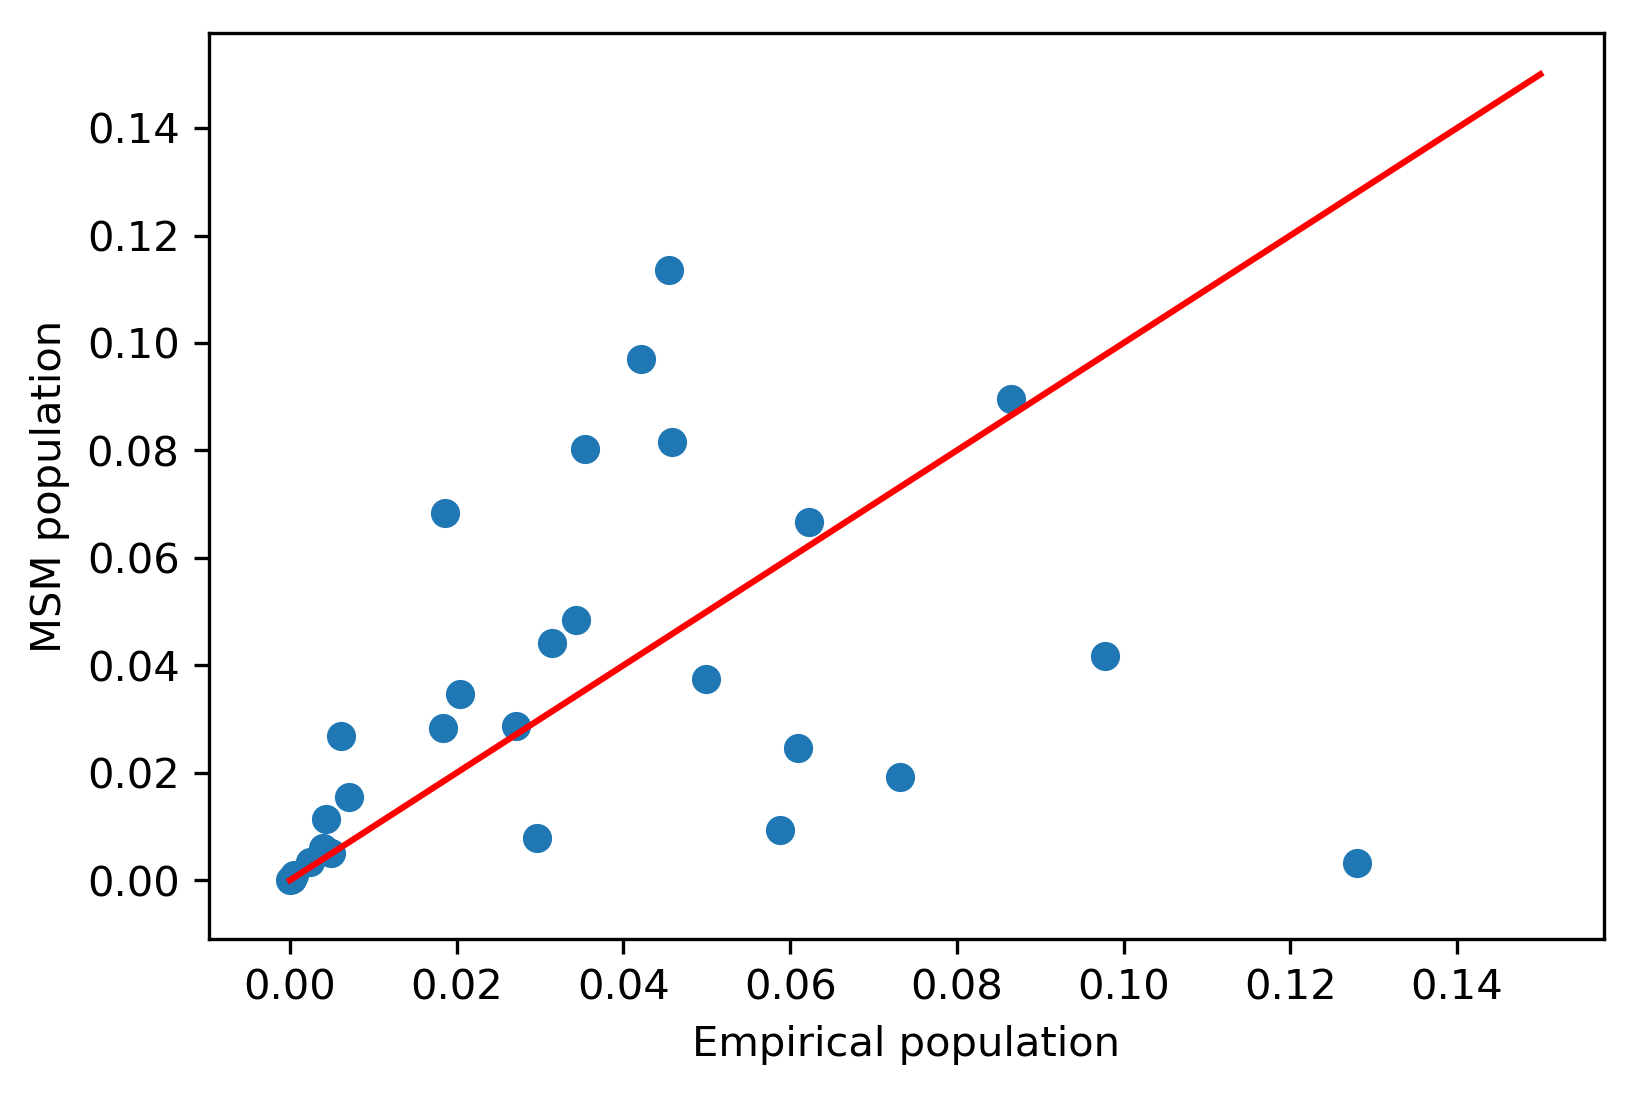

In [47]:
plt.figure(dpi=300)
plt.scatter(emp_pi[msm.active_set],msm.pi)
plt.plot([0,0.15], [0,0.15], color='red')
plt.xlabel('Empirical population')
plt.ylabel('MSM population')

In [48]:
pcca = msm.pcca(5)

In [49]:
pcca.coarse_grained_stationary_probability

array([0.19022077, 0.17788438, 0.10607299, 0.18482432, 0.34099753])

In [14]:
cktest = msm.cktest(5)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

21-03-19 02:27:51 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[1] WARNING  Ignored error during estimation: Active set is empty. Cannot estimate MSM.


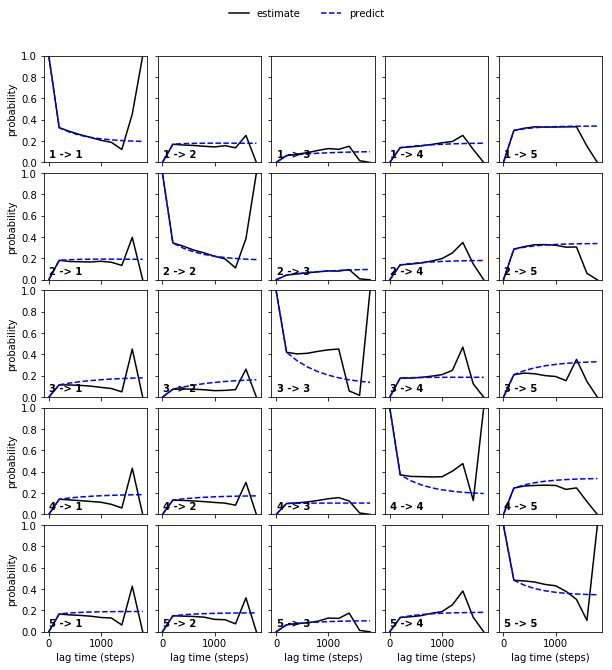

In [20]:
plt.figure(dpi=300)
pyemma.plots.plot_cktest(cktest)
plt.show()

In [50]:
# let's draw 25 frames per microstate

In [51]:
np.random.seed(7)
samples = []

for i in range(30):
    sample = msm.active_state_indexes[i][np.random.choice(range(len(msm.active_state_indexes[i])), 25)]
    samples.append(sample)    

In [52]:
np.save('randforest_distall_wt_msm_samples', samples)

In [53]:
# combine into macrostates

In [54]:
pcca.metastable_sets

[array([ 4,  9, 10, 11, 12, 13, 15, 19, 20, 21, 27, 28]),
 array([ 1,  3,  7, 16]),
 array([18, 24]),
 array([26]),
 array([ 0,  2,  5,  6,  8, 14, 17, 22, 23, 25, 29])]

In [60]:
samples = [md.load('randforest_distall_wt_msm_samples/%d.pdb' % i) for i in range(30)]

In [61]:
meta_samples = []

for j in range(5):
    for i in range(len(pcca.metastable_sets[j])):
        if i == 0:
            traj = samples[pcca.metastable_sets[j][i]]
        else:
            traj = md.join([traj, samples[pcca.metastable_sets[j][i]]])
    meta_samples.append(traj)

In [58]:
# mkdir randforest_distall_wt_msm_samples_meta

In [62]:
for i,traj in enumerate(meta_samples):
    traj.save('randforest_distall_wt_msm_samples_meta/%d.pdb' % i)

In [94]:
res_pairs_cut = np.load('res_pairs_cut.npy')

In [95]:
top = 25
string = 'resi '

for i in np.concatenate(res_pairs_cut[:top] + [2,2]):
    string += '%d or resi ' % i
    
string = string[:-9]

In [96]:
string

'resi 8 or resi 11 or resi 59 or resi 63 or resi 82 or resi 103 or resi 52 or resi 103 or resi 51 or resi 103 or resi 82 or resi 104 or resi 7 or resi 11 or resi 129 or resi 320 or resi 49 or resi 103 or resi 37 or resi 103 or resi 54 or resi 56 or resi 180 or resi 231 or resi 314 or resi 320 or resi 133 or resi 320 or resi 50 or resi 106 or resi 11 or resi 28 or resi 17 or resi 28 or resi 10 or resi 30 or resi 56 or resi 63 or resi 198 or resi 231 or resi 23 or resi 51 or resi 11 or resi 36 or resi 185 or resi 231 or resi 49 or resi 104 or resi 7 or resi 38'

In [64]:
# now insertion

In [65]:
its = pyemma.msm.its(dtrajs[1000:1999], n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

20-03-19 21:06:48 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[5] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


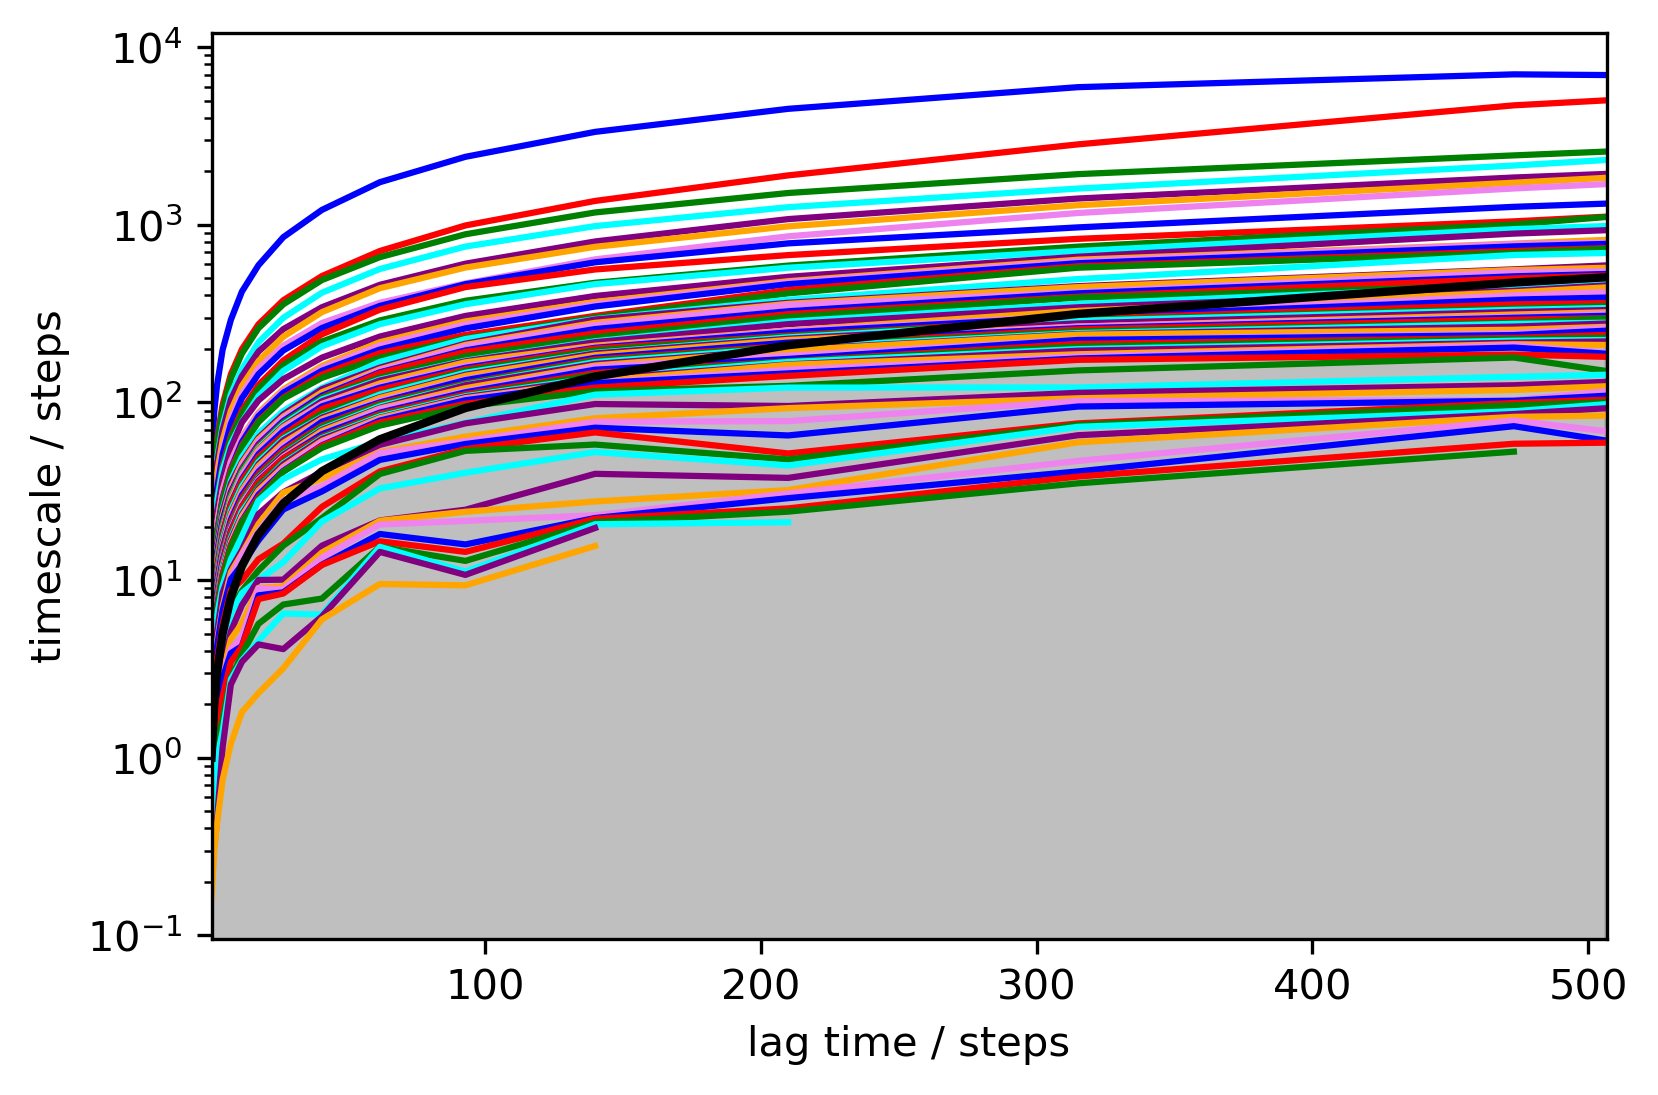

In [68]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its)

In [21]:
msm = pyemma.msma.estimate_markov_model(dtrajs[1000:1999], lag=200)

In [70]:
msm.timescales()[0]

4399.315625799712

In [71]:
msm.nstates

68

In [72]:
msm.active_count_fraction

0.9999318308456532

In [73]:
emp_pi = np.array([Counter(np.concatenate(dtrajs[1000:1999]))[x] for x in range(100)])
emp_pi = emp_pi / np.sum(emp_pi)

Text(0,0.5,'MSM population')

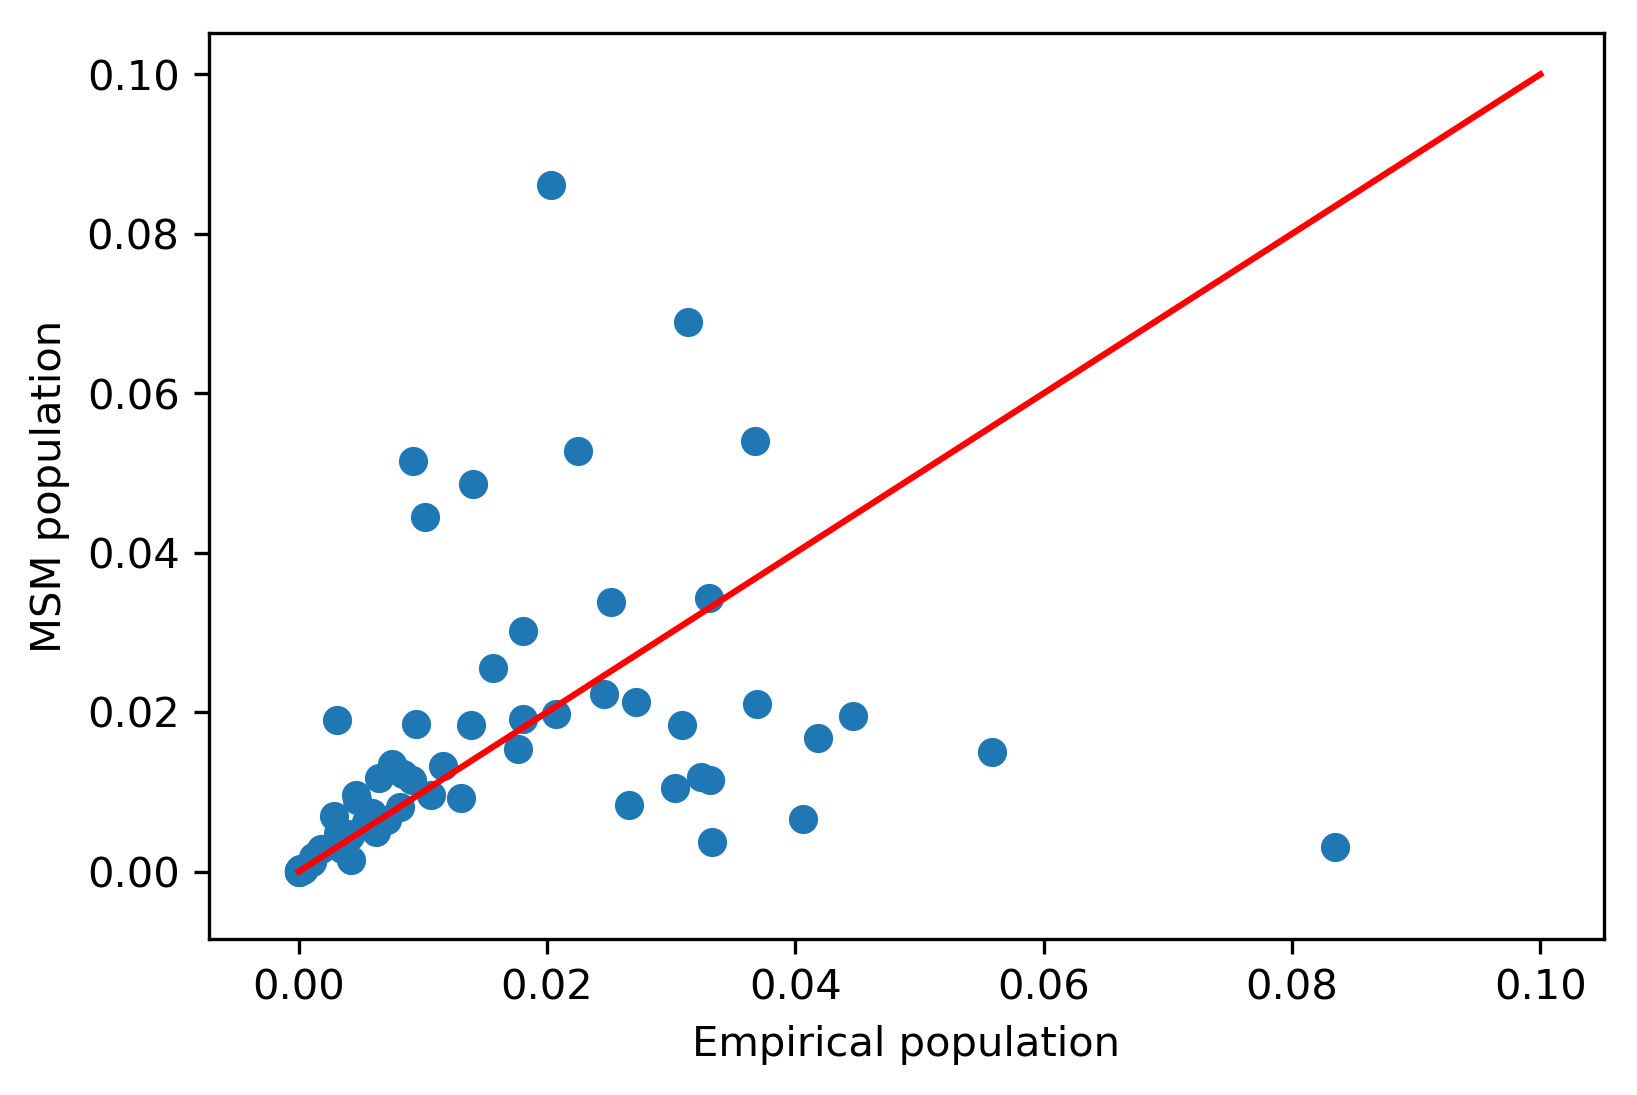

In [75]:
plt.figure(dpi=300)
plt.scatter(emp_pi[msm.active_set],msm.pi)
plt.plot([0,0.1], [0,0.1], color='red')
plt.xlabel('Empirical population')
plt.ylabel('MSM population')

In [76]:
pcca = msm.pcca(5)

In [77]:
pcca.coarse_grained_stationary_probability

array([0.1164806 , 0.14575542, 0.25944614, 0.22761125, 0.25070659])

In [22]:
cktest = msm.cktest(5)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

21-03-19 02:30:32 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[3] WARNING  Ignored error during estimation: Active set is empty. Cannot estimate MSM.


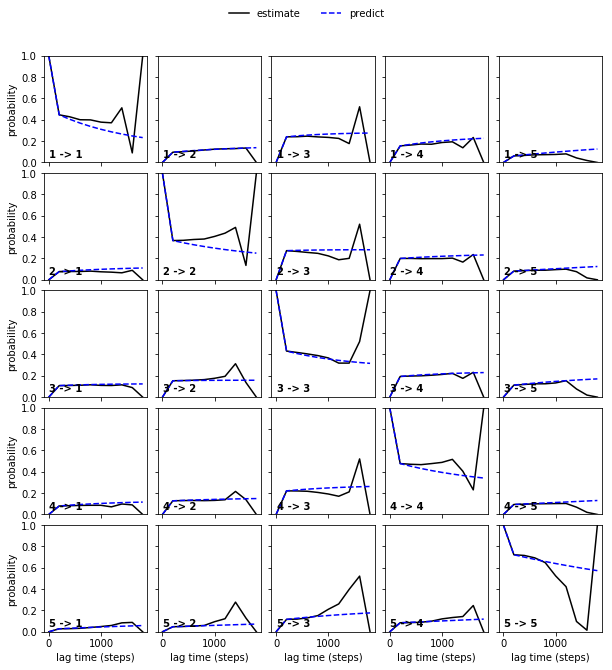

In [23]:
plt.figure(dpi=300)
pyemma.plots.plot_cktest(cktest)
plt.show()

In [78]:
# let's draw 25 frames per microstate

In [80]:
np.random.seed(7)
samples = []

for i in range(msm.nstates):
    sample = msm.active_state_indexes[i][np.random.choice(range(len(msm.active_state_indexes[i])), 25)]
    samples.append(sample)   

In [81]:
np.save('randforest_distall_ins_msm_samples', samples)

In [82]:
# combine into macrostates

In [83]:
pcca.metastable_sets

[array([40, 50, 55]),
 array([41]),
 array([ 0,  1,  3,  4,  5,  7,  8,  9, 11, 12, 15, 16, 17, 18, 19, 20, 21,
        23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 42, 44,
        45, 46, 47, 48, 49, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 63, 64,
        65, 66, 67]),
 array([ 2,  6, 10, 14, 27, 56]),
 array([13, 22, 34, 43])]

In [85]:
samples = [md.load('randforest_distall_ins_msm_samples/%d.pdb' % i) for i in range(msm.nstates)]

In [87]:
meta_samples = []

for j in [0,1]:
    for i in range(len(pcca.metastable_sets[j])):
        if i == 0:
            traj = samples[pcca.metastable_sets[j][i]]
        else:
            traj = md.join([traj, samples[pcca.metastable_sets[j][i]]])
    meta_samples.append(traj)
    
# for state 2 only 5 frames per microstate

for j in [2]:
    for i in range(len(pcca.metastable_sets[j])):
        if i == 0:
            traj = samples[pcca.metastable_sets[j][i]][::5]
        else:
            traj = md.join([traj, samples[pcca.metastable_sets[j][i]][::5]])
    meta_samples.append(traj)
    
for j in [3,4]:
    for i in range(len(pcca.metastable_sets[j])):
        if i == 0:
            traj = samples[pcca.metastable_sets[j][i]]
        else:
            traj = md.join([traj, samples[pcca.metastable_sets[j][i]]])
    meta_samples.append(traj)    

In [88]:
#mkdir randforest_distall_ins_msm_samples_meta

In [89]:
for i,traj in enumerate(meta_samples):
    traj.save('randforest_distall_ins_msm_samples_meta/%d.pdb' % i)

In [2]:
# loading res pairs after shift!
res_pairs_cut = np.load('res_pairs_cut_ins_shift.npy')

In [3]:
len(res_pairs_cut)

125

In [8]:
top = 50
string = 'resi '

for i in np.concatenate(res_pairs_cut[:top] + [2,2]):
    string += '%d or resi ' % i
    
string = string[:-9]

In [9]:
string

'resi 8 or resi 11 or resi 60 or resi 64 or resi 83 or resi 104 or resi 52 or resi 104 or resi 51 or resi 104 or resi 83 or resi 105 or resi 7 or resi 11 or resi 130 or resi 321 or resi 49 or resi 104 or resi 37 or resi 104 or resi 54 or resi 57 or resi 181 or resi 232 or resi 315 or resi 321 or resi 134 or resi 321 or resi 50 or resi 107 or resi 11 or resi 28 or resi 17 or resi 28 or resi 10 or resi 30 or resi 57 or resi 64 or resi 199 or resi 232 or resi 23 or resi 51 or resi 11 or resi 36 or resi 186 or resi 232 or resi 49 or resi 105 or resi 7 or resi 38 or resi 11 or resi 14 or resi 130 or resi 317 or resi 307 or resi 322 or resi 55 or resi 58 or resi 58 or resi 98 or resi 10 or resi 31 or resi 7 or resi 17 or resi 137 or resi 322 or resi 57 or resi 67 or resi 84 or resi 103 or resi 10 or resi 13 or resi 58 or resi 343 or resi 57 or resi 63 or resi 134 or resi 320 or resi 130 or resi 320 or resi 137 or resi 316 or resi 57 or resi 60 or resi 186 or resi 193 or resi 50 or resi 102 o

In [24]:
# now build a JOINT wt-ins msm - so that I can build a common macrostate set and clearly say which ones are 
# unique to each system, and which ones joint

In [25]:
its = pyemma.msm.its(dtrajs[:1999], n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

21-03-19 02:39:45 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[5] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


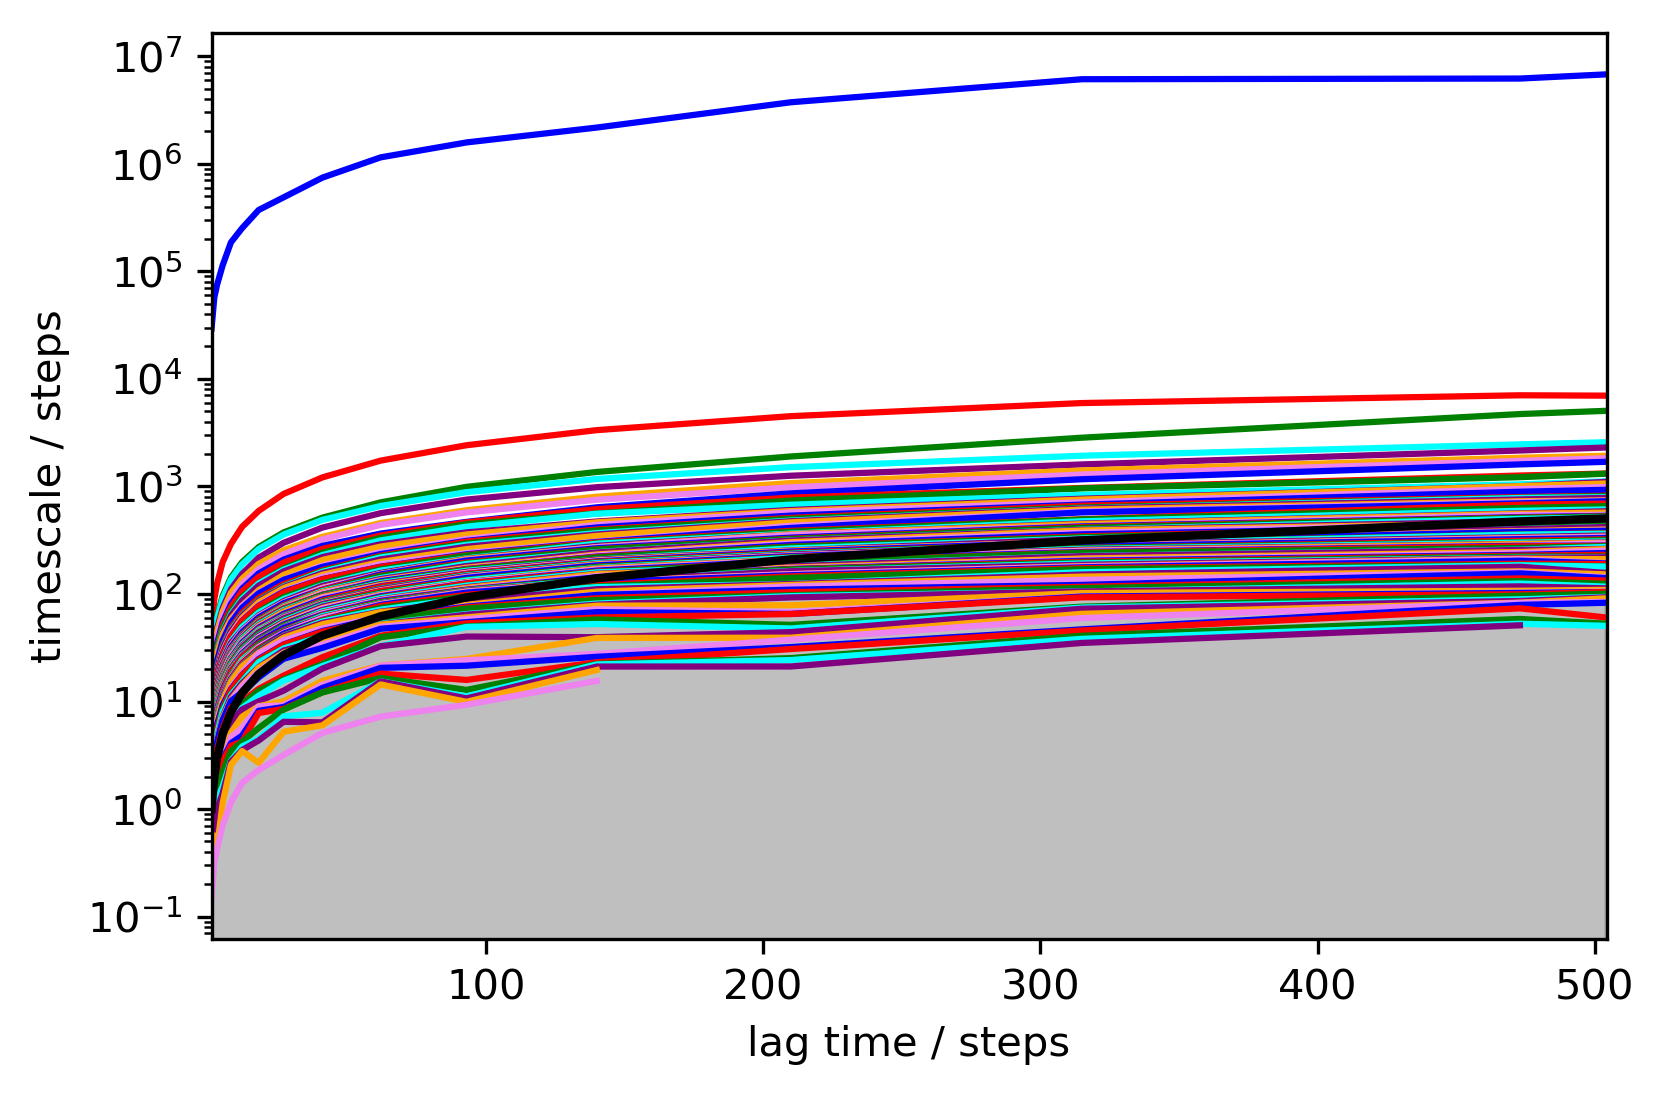

In [26]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its)

In [27]:
msm = pyemma.msm.estimate_markov_model(dtrajs[:1999], lag=200)

In [28]:
msm.timescales()[0]

3591803.493592607

In [29]:
msm.nstates

97

In [30]:
msm.active_count_fraction

0.9999657741999968

In [31]:
emp_pi = np.array([Counter(np.concatenate(dtrajs[:1999]))[x] for x in range(100)])
emp_pi = emp_pi / np.sum(emp_pi)

Text(0,0.5,'MSM population')

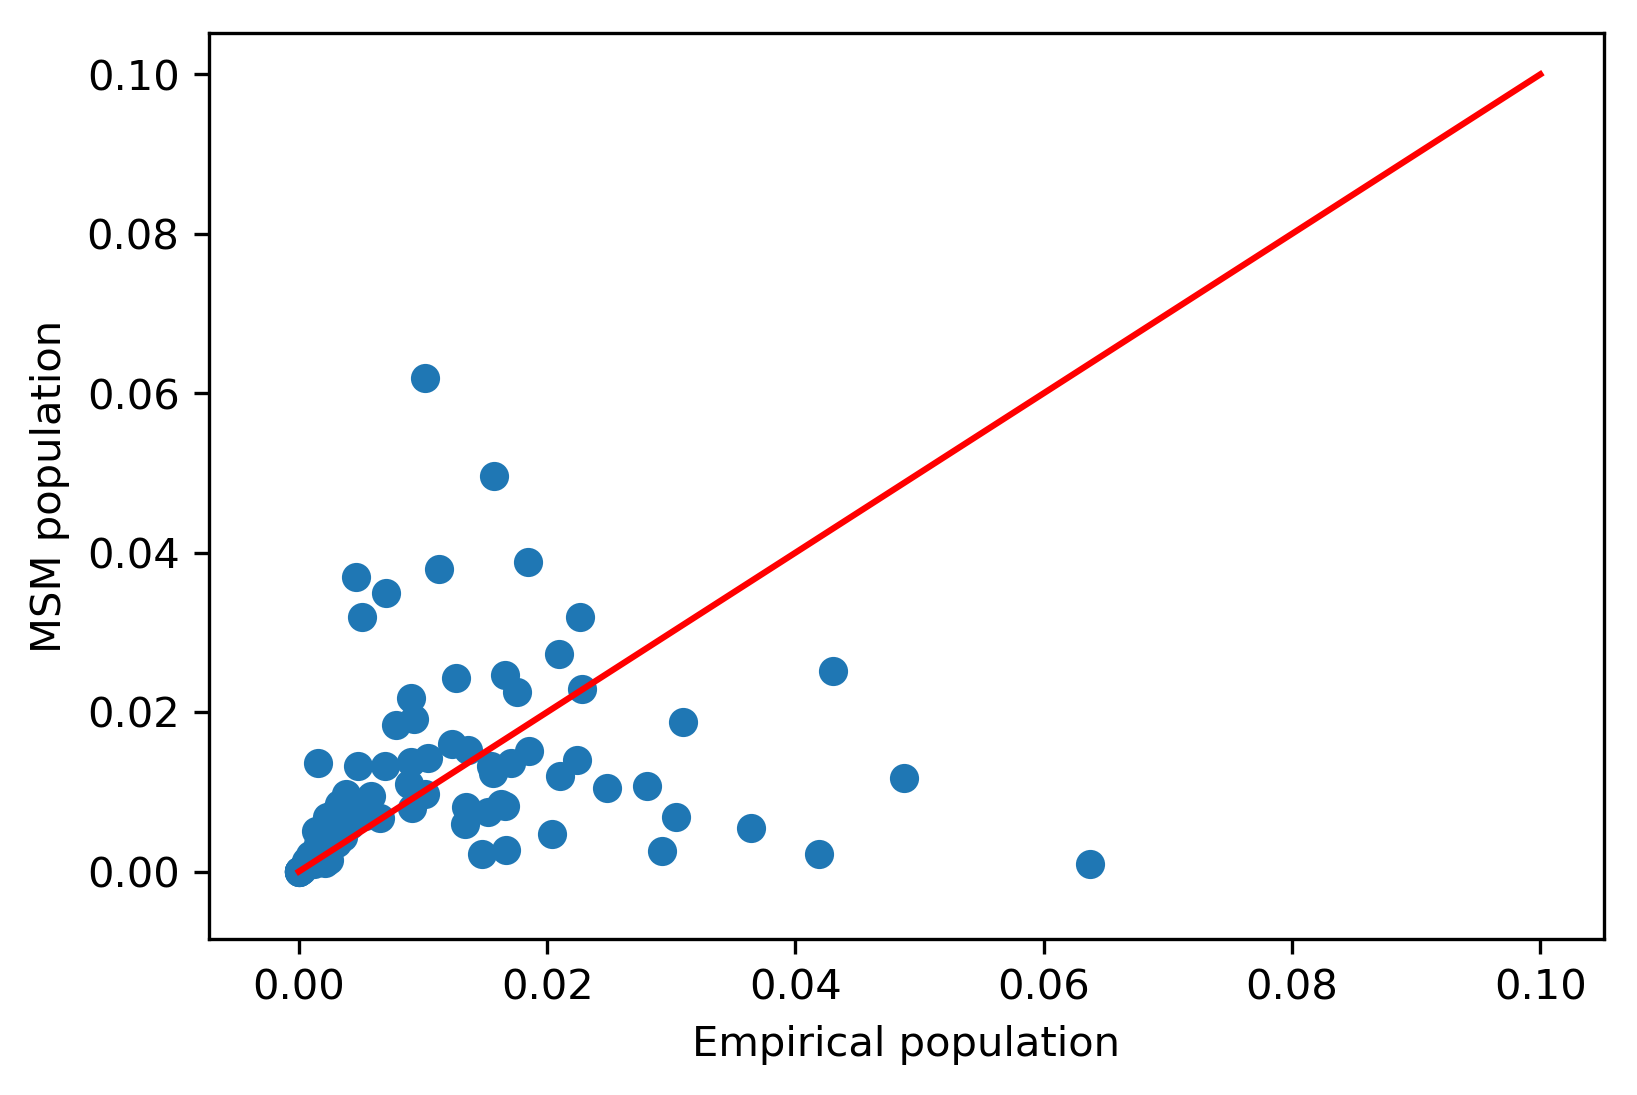

In [32]:
plt.figure(dpi=300)
plt.scatter(emp_pi[msm.active_set],msm.pi)
plt.plot([0,0.1], [0,0.1], color='red')
plt.xlabel('Empirical population')
plt.ylabel('MSM population')

In [33]:
pcca = msm.pcca(5)

In [34]:
pcca.coarse_grained_stationary_probability

array([0.12364062, 0.17908761, 0.22097427, 0.19525896, 0.28103853])

In [36]:
cktest = msm.cktest(5, n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

21-03-19 02:43:57 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[8] WARNING  Ignored error during estimation: Active set is empty. Cannot estimate MSM.


/anaconda3/lib/python3.6/site-packages/msmtools/estimation/api.py:938: NotConvergedWarning: Reversible transition matrix estimation didn't converge.
  T = sparse.mle_trev.mle_trev(C, **kwargs)


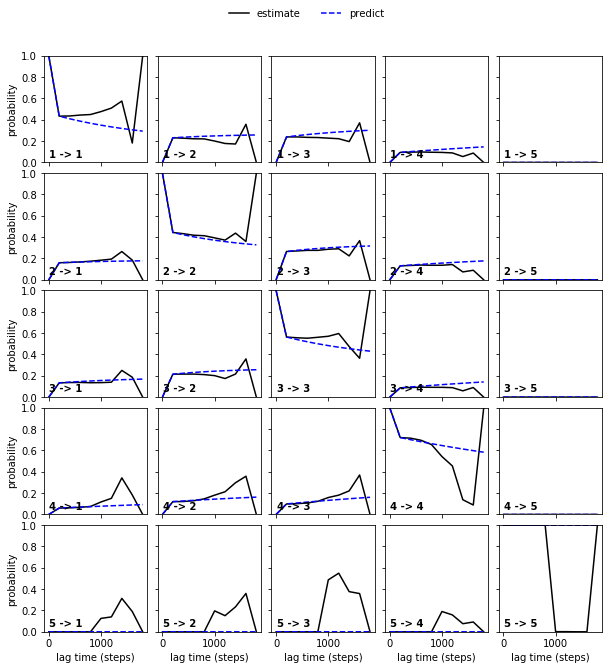

In [37]:
plt.figure(dpi=300)
pyemma.plots.plot_cktest(cktest)
plt.show()

In [74]:
# make macrostate samples - for macrostates 2 and 4 do them separately for wt and ins

In [75]:
# I need: wt MSM, ins MSM - to see which microstates are in them; combined MSM meta_sets - when sampling from those
# will need to translate to indices of wt and ins MSM samples

In [76]:
msm_wt = pyemma.msm.estimate_markov_model(dtrajs[:1000], lag=200)

In [77]:
msm_ins = pyemma.msm.estimate_markov_model(dtrajs[1000:1999], lag=200)

In [78]:
msm_comb = pyemma.msm.estimate_markov_model(dtrajs[:1999], lag=200)

In [79]:
msm_wt.active_set

array([ 0,  6,  8,  9, 10, 18, 20, 21, 23, 31, 36, 38, 39, 45, 46, 52, 56,
       57, 59, 70, 75, 77, 83, 85, 88, 92, 93, 94, 97, 99])

In [82]:
len(msm_wt.active_set)

30

In [83]:
len(msm_ins.active_set)

68

In [118]:
len(set(msm_wt.active_set) - set(msm_ins.active_set)) # 1 state overlap only!!

29

In [153]:
set(msm_wt.active_set) - (set(msm_wt.active_set) - set(msm_ins.active_set))

{8}

In [159]:
msm_ins.pi[np.argwhere(msm_ins.active_set == 8)[0,0]]*100

0.0016066562265694075

In [84]:
len(msm_comb.active_set)

97

In [90]:
set(np.concatenate([msm_wt.active_set, msm_ins.active_set])) == set(msm_comb.active_set)

True

In [145]:
pcca = msm_comb.pcca(5)

In [146]:
# translate to original macrostate labels for comparison
meta_sets = []
for state in pcca.metastable_sets:
    state_ = []
    for i in state:
        state_.append(msm.active_set[i])
    meta_sets.append(state_)    

In [147]:
print(meta_sets)

[[2, 33, 62, 76], [1, 4, 7, 11, 12, 13, 15, 22, 24, 25, 26, 27, 28, 32, 34, 35, 41, 42, 43, 44, 48, 53, 58, 61, 63, 65, 66, 67, 69, 71, 72, 74, 79, 81, 82, 84, 86, 87, 89, 90, 91, 95, 96, 98], [3, 14, 16, 19, 37, 40, 50, 51, 68, 78, 80], [5, 17, 29, 30, 49, 60, 64, 73], [0, 6, 8, 9, 10, 18, 20, 21, 23, 31, 36, 38, 39, 45, 46, 52, 56, 57, 59, 70, 75, 77, 83, 85, 88, 92, 93, 94, 97, 99]]


In [149]:
meta_sets_comb = meta_sets

In [160]:
pcca = msm_ins.pcca(5)

In [161]:
pcca.metastable_sets

[array([40, 50, 55]),
 array([41]),
 array([ 0,  1,  3,  4,  5,  7,  8,  9, 11, 12, 15, 16, 17, 18, 19, 20, 21,
        23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 42, 44,
        45, 46, 47, 48, 49, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 63, 64,
        65, 66, 67]),
 array([ 2,  6, 10, 14, 27, 56]),
 array([13, 22, 34, 43])]

In [151]:
# translate to original macrostate labels for comparison
meta_sets = []
for state in pcca.metastable_sets:
    state_ = []
    for i in state:
        state_.append(msm.active_set[i])
    meta_sets.append(state_)    

In [152]:
print(meta_sets)

[[40, 51, 58], [41], [0, 1, 3, 4, 5, 7, 8, 9, 11, 12, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 42, 44, 45, 46, 48, 49, 50, 52, 53, 56, 57, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70], [2, 6, 10, 14, 27, 59], [13, 22, 34, 43]]


In [162]:
msm_ins.pi[41]

0.04867078349787012

In [ ]:
wt = []

for i in msm_wt.active_set:
    for j,meta_set in enumerate(meta_sets):
        if i in meta_set:
            wt.append(j)

In [ ]:
set(wt) # one macrostate only in wt

In [ ]:
ins = []

for i in msm_ins.active_set:
    for j,meta_set in enumerate(meta_sets):
        if i in meta_set:
            ins.append(j)

In [ ]:
set(ins)

In [96]:
# first wt

In [127]:
samples = []
for i in range(msm_wt.nstates):
    samples.append(md.load('randforest_distall_wt_msm_samples/%d.pdb' % i))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [128]:
pcca = msm_comb.pcca(5)
meta_samples = []

for macro in range(5):
    traj_made = False
    for micro in pcca.metastable_sets[macro]:
        # translate to original microstate labeling
        micro = msm_comb.active_set[micro]
        if micro in msm_wt.active_set:
            if not traj_made:
                traj = samples[np.argwhere(msm_wt.active_set == micro)[0,0]]
                traj_made = True
            else:
                traj = md.join([traj, samples[np.argwhere(msm_wt.active_set == micro)[0,0]]])
    if traj_made:        
        meta_samples.append(traj)

In [129]:
meta_samples

[<mdtraj.Trajectory with 750 frames, 5802 atoms, 360 residues, and unitcells at 0x1a8408d470>]

In [134]:
#mkdir wt_meta_samples_from_wt_ins_msm

In [135]:
for i,traj in enumerate(meta_samples):
    traj.save('wt_meta_samples_from_wt_ins_msm/%d.pdb' % i)

In [136]:
# now ins

In [137]:
samples = []
for i in range(msm_ins.nstates):
    samples.append(md.load('randforest_distall_ins_msm_samples/%d.pdb' % i))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


In [142]:
pcca = msm_comb.pcca(5)
meta_samples = []

for macro in [0]:
    traj_made = False
    for micro in pcca.metastable_sets[macro]:
        # translate to original microstate labeling
        micro = msm_comb.active_set[micro]
        if micro in msm_ins.active_set:
            if not traj_made:
                traj = samples[np.argwhere(msm_ins.active_set == micro)[0,0]]
                traj_made = True
            else:
                traj = md.join([traj, samples[np.argwhere(msm_ins.active_set == micro)[0,0]]])
    if traj_made:        
        meta_samples.append(traj)
        
# for state 1 only 5 samples per microstate due to size    
for macro in [1]:
    traj_made = False
    for micro in pcca.metastable_sets[macro]:
        # translate to original microstate labeling
        micro = msm_comb.active_set[micro]
        if micro in msm_ins.active_set:
            if not traj_made:
                traj = samples[np.argwhere(msm_ins.active_set == micro)[0,0]][::5]
                traj_made = True
            else:
                traj = md.join([traj, samples[np.argwhere(msm_ins.active_set == micro)[0,0]][::5]])
    if traj_made:        
        meta_samples.append(traj)
        
for macro in [2,3,4]:
    traj_made = False
    for micro in pcca.metastable_sets[macro]:
        # translate to original microstate labeling
        micro = msm_comb.active_set[micro]
        if micro in msm_ins.active_set:
            if not traj_made:
                traj = samples[np.argwhere(msm_ins.active_set == micro)[0,0]]
                traj_made = True
            else:
                traj = md.join([traj, samples[np.argwhere(msm_ins.active_set == micro)[0,0]]])
    if traj_made:        
        meta_samples.append(traj)

In [143]:
meta_samples

[<mdtraj.Trajectory with 100 frames, 5816 atoms, 361 residues, and unitcells at 0x1a910699b0>,
 <mdtraj.Trajectory with 220 frames, 5816 atoms, 361 residues, and unitcells at 0x1a8f9f2828>,
 <mdtraj.Trajectory with 275 frames, 5816 atoms, 361 residues, and unitcells at 0x1a8e2e3d68>,
 <mdtraj.Trajectory with 200 frames, 5816 atoms, 361 residues, and unitcells at 0x1a832bcb00>,
 <mdtraj.Trajectory with 25 frames, 5816 atoms, 361 residues, and unitcells at 0x1a8cdd1fd0>]

In [139]:
#mkdir ins_meta_samples_from_wt_ins_msm

In [144]:
for i,traj in enumerate(meta_samples):
    traj.save('ins_meta_samples_from_wt_ins_msm/%d.pdb' % i)

In [163]:
del samples

In [164]:
del meta_samples

In [2]:
# didn't analyze those - decide to go straight to final product: make MSM of all 4 combines, do pcca to divide both wt
# and insertion sides into at least 2 states with different populations

In [5]:
# figure idea: show MSM state populations between systems - for each state: 
# STRUCTURES colored by the contact map
# important distances, angle - FIND OUT cis-phosphorylation readout - Tyr/Thr oxygen distance to Asp oxygen? (or C-alphas?)

# My's contact map figure - i.e overall changes

# all existing go to SI - except keep the general KINASE ARCHITECTURE (H now)

# I'm going to try to make it myself, then send draft to My

In [ ]:
# # code to copy
# dtrajs = np.load('randforest_distall_dtrajs.npy')
# dtrajs = [np.concatenate(x) for x in dtrajs]

# its = pyemma.msm.its(dtrajs, n_jobs=8)
# plt.figure(dpi=300)
# pyemma.plots.plot_implied_timescales(its)

# msm = pyemma.msm.estimate_markov_model(dtrajs, lag=200)
# msm.timescales()[0]
# msm.nstates
# msm.active_count_fraction
# emp_pi = np.array([Counter(np.concatenate(dtrajs))[x] for x in range(100)])
# emp_pi = emp_pi / np.sum(emp_pi)

# plt.figure(dpi=300)
# plt.scatter(emp_pi[msm.active_set],msm.pi)
# plt.plot([0,0.05], [0,0.05], color='red')
# plt.xlabel('Empirical population')
# plt.ylabel('MSM population')

# pcca = msm.pcca(2)
# pcca.coarse_grained_stationary_probability

# cktest = msm.cktest(5, n_jobs=8)
# plt.figure(dpi=300)
# pyemma.plots.plot_cktest(cktest)
# plt.show()

In [9]:
dtrajs = np.load('randforest_distall_dtrajs.npy')
dtrajs = [np.concatenate(x) for x in dtrajs]

In [12]:
len(dtrajs)

3999

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

/anaconda3/lib/python3.6/site-packages/msmtools/estimation/api.py:943: NotConvergedWarning: Reversible transition matrix estimation didn't converge.
  T = dense.mle_trev.mle_trev(C, **kwargs)
/anaconda3/lib/python3.6/site-packages/msmtools/estimation/api.py:943: NotConvergedWarning: Reversible transition matrix estimation didn't converge.
  T = dense.mle_trev.mle_trev(C, **kwargs)
/anaconda3/lib/python3.6/site-packages/msmtools/estimation/api.py:943: NotConvergedWarning: Reversible transition matrix estimation didn't converge.
  T = dense.mle_trev.mle_trev(C, **kwargs)


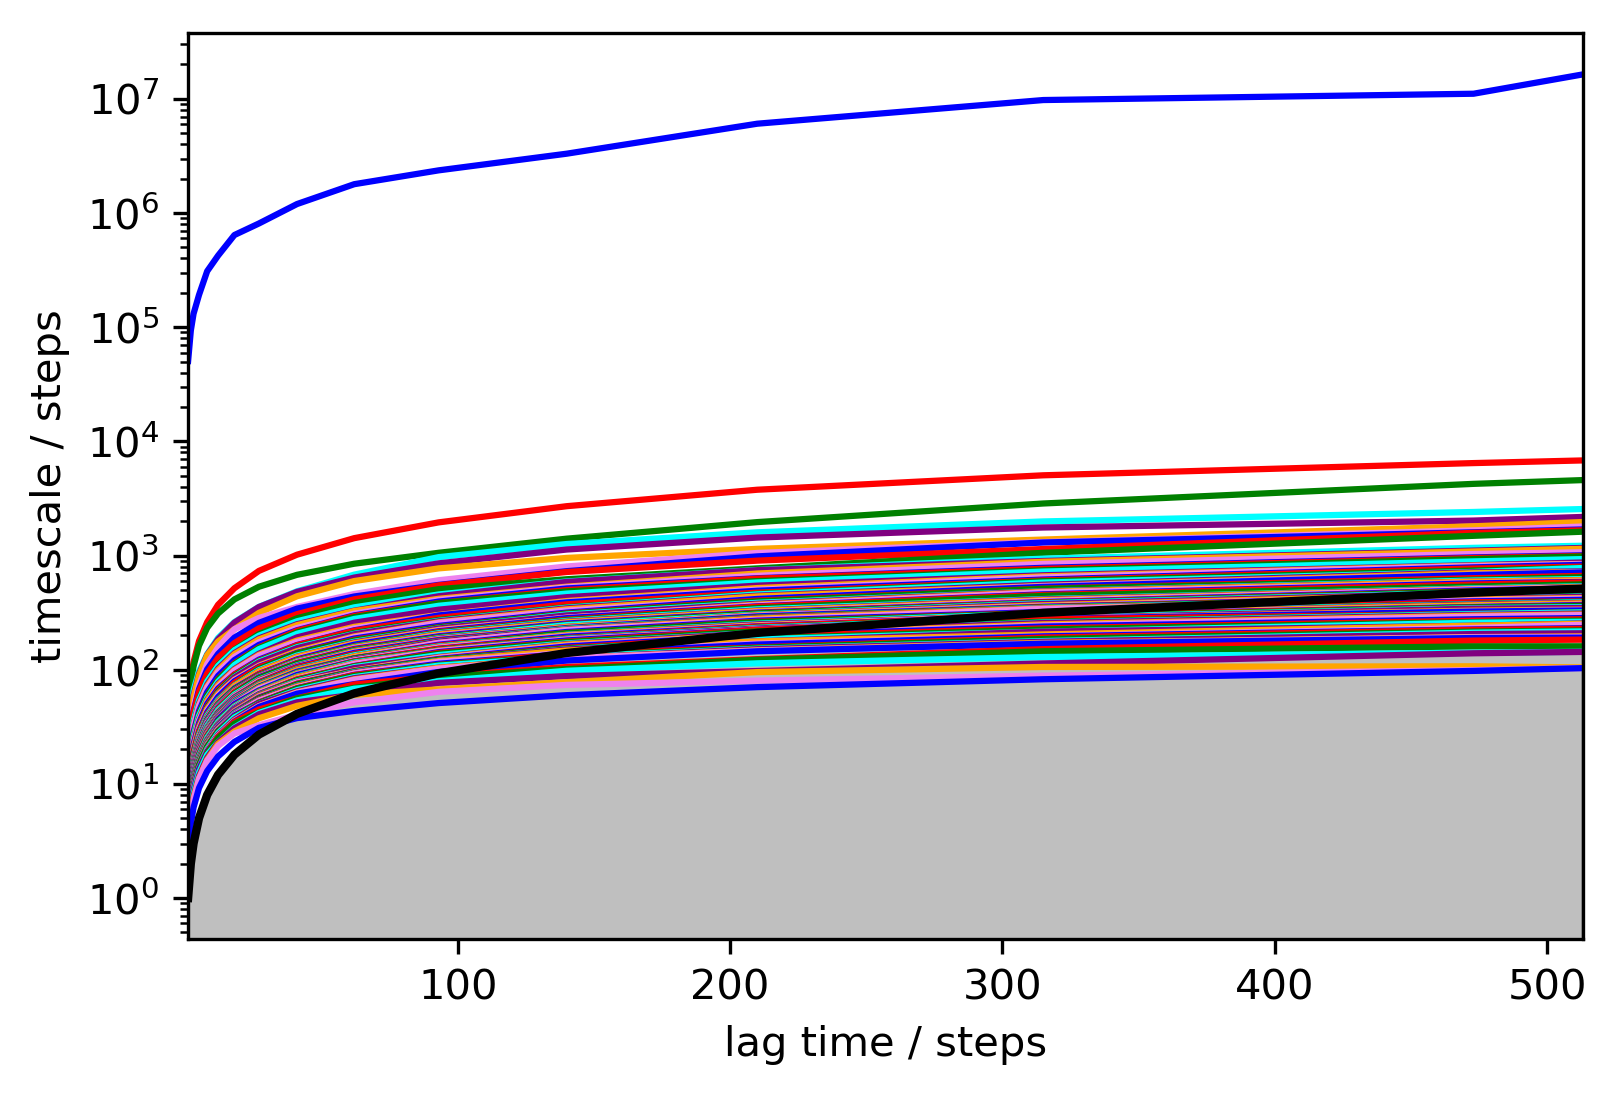

In [10]:
its = pyemma.msm.its(dtrajs, n_jobs=8)
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its)

In [11]:
msm = pyemma.msm.estimate_markov_model(dtrajs, lag=200)

In [13]:
msm.timescales()[0]

5672884.392454988

In [14]:
msm.nstates

100

In [15]:
msm.active_count_fraction

1.0

In [16]:
emp_pi = np.array([Counter(np.concatenate(dtrajs))[x] for x in range(100)])
emp_pi = emp_pi / np.sum(emp_pi)

Text(0,0.5,'MSM population')

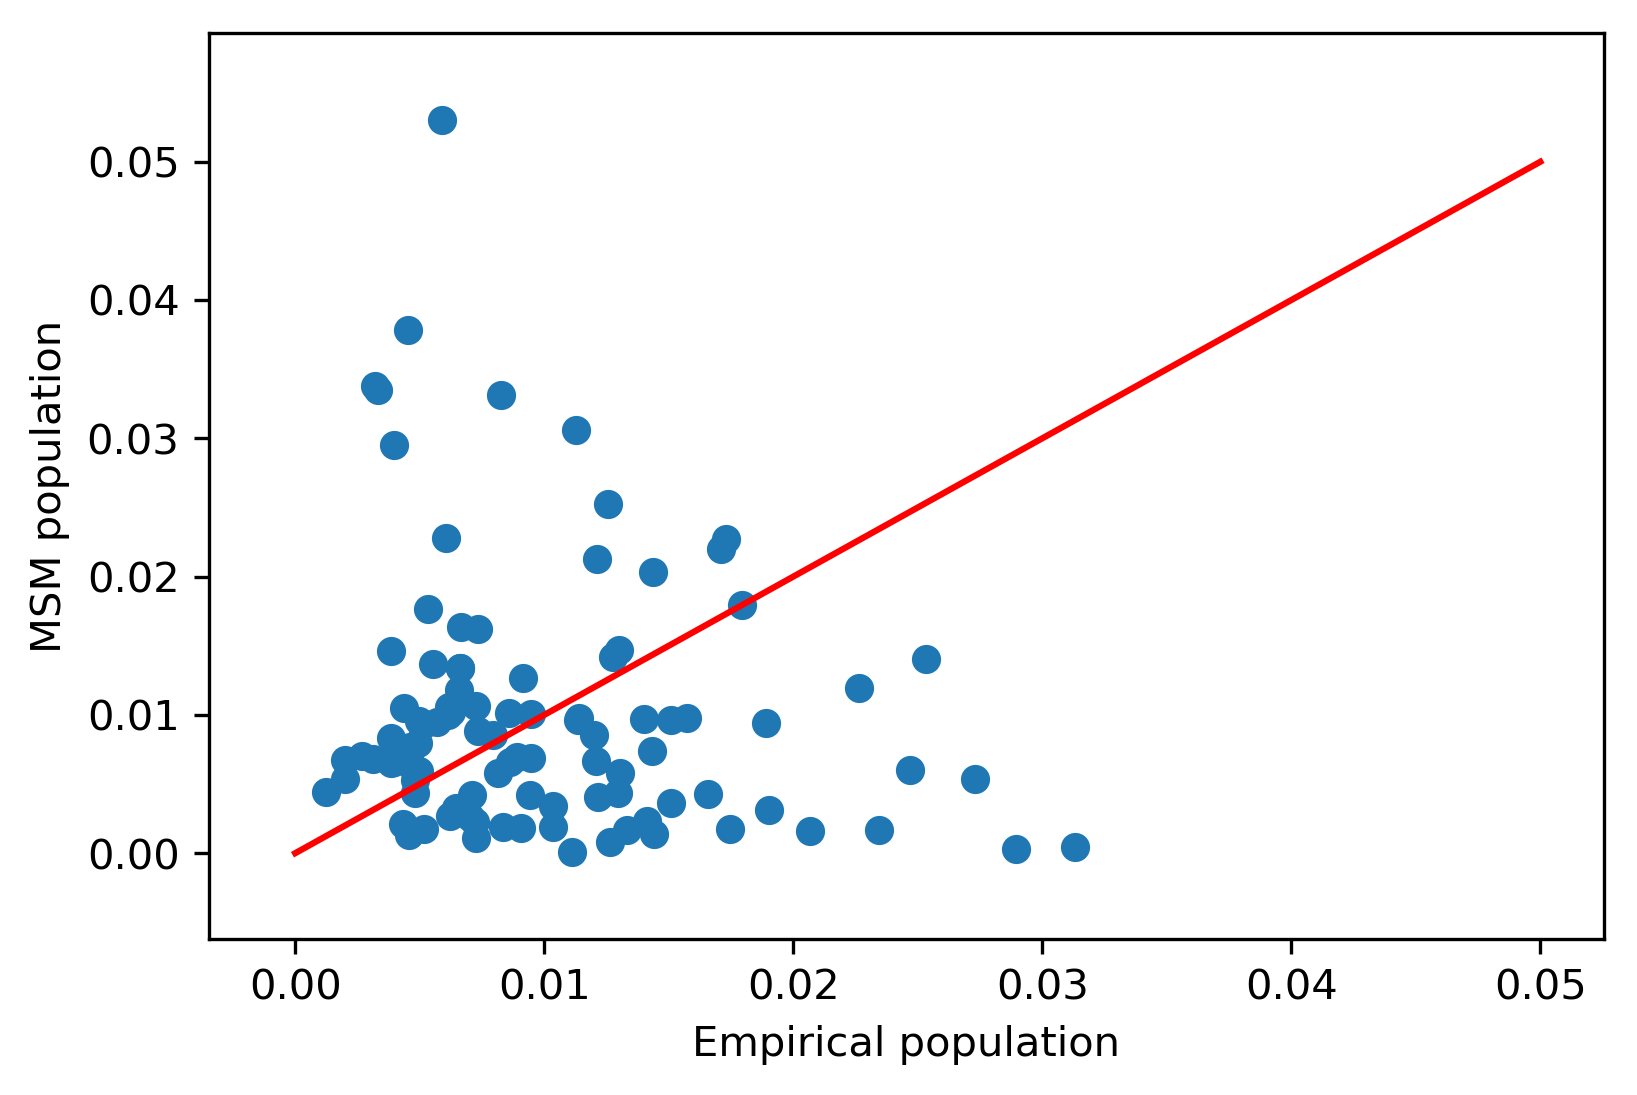

In [17]:
plt.figure(dpi=300)
plt.scatter(emp_pi[msm.active_set],msm.pi)
plt.plot([0,0.05], [0,0.05], color='red')
plt.xlabel('Empirical population')
plt.ylabel('MSM population')

In [150]:
pcca = msm.pcca(9)

In [151]:
# translate to original macrostate labels for comparison
meta_sets = []
for state in pcca.metastable_sets:
    state_ = []
    for i in state:
        state_.append(msm.active_set[i])
    meta_sets.append(state_)

In [152]:
# msm_wt = pyemma.msm.estimate_markov_model(dtrajs[:1000], lag=200)

In [153]:
# msm_ins = pyemma.msm.estimate_markov_model(dtrajs[1000:1999], lag=200)

In [154]:
# msm_mut = pyemma.msm.estimate_markov_model(dtrajs[1999:2999], lag=200)

In [155]:
# msm_ins_mut = pyemma.msm.estimate_markov_model(dtrajs[2999:3999], lag=200)

In [156]:
wt = []

for i in msm_wt.active_set:
    for j,meta_set in enumerate(meta_sets):
        if i in meta_set:
            wt.append(j)

In [157]:
ins = []

for i in msm_ins.active_set:
    for j,meta_set in enumerate(meta_sets):
        if i in meta_set:
            ins.append(j)

In [158]:
mut = []

for i in msm_mut.active_set:
    for j,meta_set in enumerate(meta_sets):
        if i in meta_set:
            mut.append(j)

In [159]:
ins_mut = []

for i in msm_ins_mut.active_set:
    for j,meta_set in enumerate(meta_sets):
        if i in meta_set:
            ins_mut.append(j)

In [160]:
set(wt)

{3, 6}

In [161]:
set(ins)

{0, 1, 2, 4, 5, 6, 7, 8}

In [162]:
set(mut)

{3, 6}

In [163]:
set(ins_mut)

{0, 1, 2, 4, 5, 7, 8}

In [164]:
# look at populations

In [166]:
wt_pi = [0]*9

for i,state in enumerate(msm_wt.active_set):
    for j,meta_set in enumerate(meta_sets):
        if state in meta_set:
            wt_pi[j] += msm_wt.pi[i]

In [168]:
ins_pi = [0]*9

for i,state in enumerate(msm_ins.active_set):
    for j,meta_set in enumerate(meta_sets):
        if state in meta_set:
            ins_pi[j] += msm_ins.pi[i]

In [169]:
mut_pi = [0]*9

for i,state in enumerate(msm_mut.active_set):
    for j,meta_set in enumerate(meta_sets):
        if state in meta_set:
            mut_pi[j] += msm_mut.pi[i]

In [170]:
ins_mut_pi = [0]*9

for i,state in enumerate(msm_ins_mut.active_set):
    for j,meta_set in enumerate(meta_sets):
        if state in meta_set:
            ins_mut_pi[j] += msm_ins_mut.pi[i]

In [186]:
np.set_printoptions(suppress=True)

In [187]:
np.array(wt_pi)*100

array([ 0.        ,  0.        ,  0.        ,  9.52557386,  0.        ,
        0.        , 90.47442614,  0.        ,  0.        ])

In [188]:
np.array(ins_pi)*100

array([ 1.35579218,  0.04412706,  5.24718361,  0.        ,  4.86707835,
       17.65242743,  0.00160666, 21.09777065, 49.73401407])

In [189]:
np.array(mut_pi)*100

array([ 0.        ,  0.        ,  0.        , 19.72196322,  0.        ,
        0.        , 80.27803678,  0.        ,  0.        ])

In [190]:
np.array(ins_mut_pi)*100

array([ 0.90684589,  5.29094488,  2.45663947,  0.        ,  4.43974665,
        2.10697643,  0.        , 22.81119728, 61.9876494 ])

In [192]:
# plot these

In [215]:
# import seaborn as sns
# sns.set_style('ticks')

In [231]:
# sns.color_palette("Paired")

In [232]:
# plt.figure(dpi=300)
# plt.axis("equal")
# # create data
# size_of_groups = ins_pi

# colors = sns.color_palette("husl", 9)
# # Create a pieplot
# plt.pie(size_of_groups, colors=colors)
 
# # add a circle at the center
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
 
# plt.show()

In [233]:
# final change of plans - we make two MSMs separately - for wt+mut, and ins+ins_mut - with state numbers
# dictated by timescale separation

In [234]:
# do this in a fresh notebook